In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from skimage import io
import random
import numpy.matlib

C:\Users\nwk\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


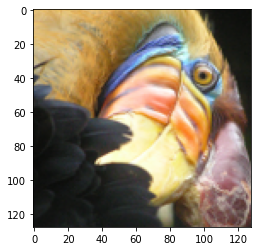

In [2]:
img = io.imread('/content/drive/MyDrive/input.png')
img = img/255
height, width, channels = np.shape(img)
flat = img.reshape(img.shape[0]*img.shape[1], 3)
plt.imshow(img)
plt.show()

In [3]:
# centroid initialization
def centroid_initialization(flat,K):
    return random.sample(list(flat),K)

In [4]:
# index of closest centroids
def nearestCentroids(point,rand_centroids):
    K = np.size(rand_centroids,0)
    idx = np.zeros((np.size(point,0),1))
    x = np.empty((np.size(point,0),1))
    for i in range(K):
        j = rand_centroids[i]
        var = np.ones((np.size(point,0),1))*j
        sub = np.subtract(point,var)
        var_1 = np.power(sub,2)
        var_2 = np.sum(var_1,axis = 1)
        var_2 = np.asarray(var_2)
        var_2.resize((np.size(point,0),1))
        x = np.append(x, var_2, axis=1)
    x = np.delete(x,0,axis=1)
    idx = np.argmin(x, axis=1)
    return idx

In [5]:
# new centroid and updates
def computeCentroids(flat,idx,K):
    n = np.size(flat,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        var = idx ==i
        #print(var)
        var = var.astype(int)
        total_num = sum(var);
        var.resize((np.size(flat,0),1))
        total_mat = np.matlib.repmat(var,1,n)
        var = np.transpose(var)
        total = np.multiply(flat,total_mat)
        centroids[i] = (1/total_num)*np.sum(total,axis=0)
    return centroids

In [6]:
# kmeans algorithm
def KMeans_Image(flat,initial_centroids,num_iteration):
    m = np.size(flat,0)
    n = np.size(flat,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    ix = np.zeros((m,1))
    for i in range(1,num_iteration):
        ix = nearestCentroids(flat,centroids)
        centroids = computeCentroids(flat,ix,K)
    return centroids,ix

In [7]:
num_iters = 20 # number of iteration
K = 10  # number of clusters
centroids, idx = KMeans_Image(flat,centroid_initialization(flat,K),num_iters)
rows = img.shape[0]
cols = img.shape[1]

In [10]:
idx = nearestCentroids(flat,centroids)
recovered_image = centroids[idx]
print(np.shape(recovered_image))
recovered_image = np.reshape(recovered_image, (rows, cols, 3))

(16384, 3)


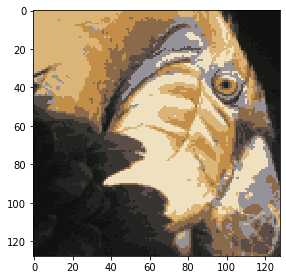

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [11]:
# Save final output of reduced image.
io.imshow(recovered_image)
io.show()
io.imsave('/content/drive/MyDrive/recovered_image.png', recovered_image)